In [69]:
import jieba
from collections import Counter
import math

In [71]:
train_pos= './pos_train.txt'
train_neg= './neg_train.txt'
test_pos= './pos_test.txt'
test_neg= './neg_test.txt'

In [72]:
#返回一个Counter，里面装有filepath里所有word的词频
def initLM(filepath):
    lm=Counter()
    with open(filepath) as f:
        for line in f:
            words= jieba.cut(line.strip())
            for word in words:
                if word >=u'\u4e00' and word<=u'\u9fff':
                    lm[word]+=1
    return lm

In [73]:
lm_pos=initLM(train_pos)
lm_neg= initLM(train_neg)

Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
Loading model cost 0.309 seconds.
Prefix dict has been built succesfully.


In [75]:
#根据Counter里已有的pos和neg中出现每个词的概率来判断整个句子是pos还是neg
def sentenceEmotion(sentence, lm_pos, lm_neg):
    pos_freq= float(0)
    neg_freq= float(0)
    for word in jieba.cut(sentence.strip()):
        if word >=u'\u4e00' and word<=u'\u9fff':
            if word in lm_pos:
                pos_freq += math.log(lm_pos[word])
            elif word in lm_neg:
                neg_freq += math.log(lm_neg[word])
    return pos_freq, neg_freq

In [76]:
#给一个全是（pos||neg）句子的文档，看（有多少能句子被判断为pos，多少被误判为neg||有多少能句子被判断为neg，多少被误判为pos）
def judgeEmotion(testFile):
    line_no=0
    posFromTest=0
    negFromTest=0
    with open(testFile) as f:
            for line in f:
                line_no +=1
                pos, neg= sentenceEmotion(line, lm_pos, lm_neg)
                if pos>neg:
                    posFromTest +=1
                   # print line
                    # print "positive emotion"
                else:
                    negFromTest +=1
                   # print line
                   # print "negative"
    return posFromTest, negFromTest,line_no

In [77]:
TP, FN, TrueTotal = judgeEmotion(test_pos)
print (judgeEmotion(test_pos))

(4947, 18, 4965)


In [78]:
TN, FP, FalseTotal = judgeEmotion(test_neg)
print (judgeEmotion(test_neg))

(5561, 12, 5573)


## Gradient

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import time

In [3]:
%matplotlib inline

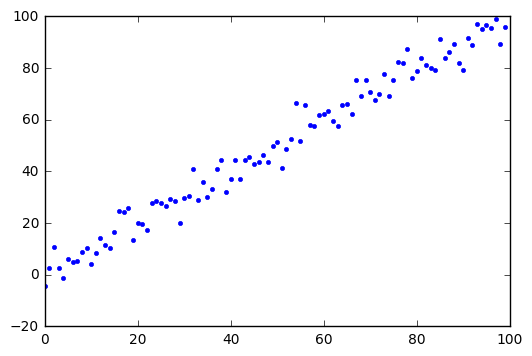

In [4]:
x= np.arange(100)
y = x+ np.random.normal(scale=5, size=100)
plt.plot(x,y,'.')

In [6]:
def gradientW(w, x, b, y):
    return np.sum((w*x+b -y)*x)

In [7]:
def gradientB(w, x, b, y):
    return np.sum(w*x+b-y)

In [8]:
def cost(w,x,b,y):
    return (np.sum((w*x+b-y)**2))/len(x)

In [43]:
#initiate Value
def initValue(x,y):
    w = np.random.random()
    b = np.random.random()
    gw = gradientW(w,x,b,y)
    gb = gradientB(w,x,b,y)
    print("Initial w and b: w: %f b: %f" %(w,b))
    return w,b,gw,gb
    
    
def gradientDescent(x, y, epsilon):
    startTime= time.clock()
    learningRate = 0.002
    w,b,gw,gb= initValue(x,y)
    prev_cost = cost(w,x,b,y)
    while abs(gw) > epsilon and abs(gb) > epsilon: #终止条件
        curr_cost = cost(w,x,b,y)
        if curr_cost > prev_cost:
            learningRate /= 2.0
            prev_cost = curr_cost
            w = prev_w
            b = prev_b
        gw = gradientW(w,x,b,y)
        gb = gradientB(w,x,b,y)
        prev_w = w
        prev_b = b
        w -= learningRate*gw
        b -= learningRate*gb
      #  print ("w: %f, b: %f" %(w,b))
    stoptime= time.clock()
    duration= stoptime- startTime
    print("Final w and b: w: %f b: %f" %(w,b))
    print ("Duration: %f s" %duration)

In [65]:
gradientDescent(x,y,1e-3)

Initial w and b: w: 0.661562 b: 0.096904
Final w and b: w: 0.991454 b: 0.533854
Duration: 1.156397 s


In [50]:
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [52]:
y

array([ -4.51639692,   2.69789114,  10.74575256,   2.77158599,
        -1.29575531,   6.19852465,   5.05857563,   5.43276932,
         8.79995763,  10.35623127,   3.98021794,   8.52586239,
        14.21347483,  11.58967987,  10.26971266,  16.61640912,
        24.60709333,  24.25108095,  25.90539035,  13.59584229,
        19.85936193,  19.74901413,  17.22577522,  27.79138587,
        28.39144372,  27.94325668,  26.46449738,  29.4571846 ,
        28.49546183,  19.96235731,  29.58919836,  30.67253578,
        41.12593021,  28.8317822 ,  35.75936126,  30.02908141,
        33.36912643,  40.88504712,  44.41982542,  32.06231403,
        37.03729665,  44.42047277,  37.1832115 ,  44.36808552,
        45.56988824,  42.94383755,  43.49377183,  46.20132472,
        43.78979686,  49.93573803,  51.49247265,  41.16362577,
        48.81341904,  52.63774241,  66.54693087,  51.95092464,
        65.61846518,  57.94295451,  57.56426762,  61.90485517,
        62.26148692,  63.46062682,  59.46070457,  57.57